In [4]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('spotify-charts-eda-project')
jovian.set_colab_id('10uGREzaGEozUB1LPPaJh90o9AJ1Sd5qg')

# spotify-charts-eda-project

Use the "Run" button to execute the code.

In [5]:
!pip install jovian --upgrade --quiet

In [6]:
import jovian

In [7]:
# Execute this to save new versions of the notebook
jovian.commit(project="spotify-charts-eda-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anushkagupta/spotify-charts-eda-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/anushkagupta/spotify-charts-eda-project


'https://jovian.ai/anushkagupta/spotify-charts-eda-project'

# **Spotify Charts, Exploratory Data Analysis**


Exploratory Data Analysis refers to the critical process of performing initial 
investigations on data so as to discover patterns,to spot anomalies,to test 
hypothesis and to check assumptions with the help of summary statistics and graphical representations.


The dataset has been taken from kaggle, and it contains information of all the "Top 200" and "Viral 50" charts published globally by Spotify. Spotify publishes a new chart every 2-3 days. This is its entire collection since January 1, 2017. The dataset can be used to identify the different artists people listen to most across the world, and the growth of various artists through the years.





In [8]:
pip install opendatasets --upgrade --quiet


Note: you may need to restart the kernel to use updated packages.


In [9]:
import opendatasets as od 

download_url = 'https://www.kaggle.com/datasets/dhruvildave/spotify-charts'

od.download(download_url)

Skipping, found downloaded files in ".\spotify-charts" (use force=True to force download)


In [10]:
dataset_filename = './spotify-charts/charts.csv'

## **Data Preparation and Cleaning:**


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(dataset_filename)

In [13]:
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


#### getting information regarding the dataset, such as the number of entries, types of data types used, and the amount of memory used:


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


#### getting the number of missing data per column:

In [15]:
df.isna().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [16]:
stream_mean = df['streams'].mean(skipna = True)
print(stream_mean)

55261.314376595816


#### filling the stream's missing data as the average of all the streams: 

In [17]:
df['streams'].fillna(stream_mean, inplace = True)

In [18]:
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.000000
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.000000
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.000000
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.000000
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.000000
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,55261.314377
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,55261.314377
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,55261.314377
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,55261.314377


#### deleting all rows where the title and artist columns contain NaN values:

In [19]:
df = df.dropna( how='any', subset=['title', 'artist'])

In [20]:
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.000000
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.000000
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.000000
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.000000
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.000000
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,55261.314377
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,55261.314377
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,55261.314377
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,55261.314377


## **Exploratory Data Analysis and Data Vizualization:**

### **Questions to Answer:** 
- What are the top songs that have occured the most in the Top 200 and Viral 50 Charts across all the regions? 
- Who are the top artists whose songs are present in the charts? 
- Find the popularity of a particular artist across all the regions in the world. 
- What are the top countries which contribute the most to sales across the world?

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Ques1. Which are the top songs that have occured the most in the Top 200 and Viral 50 Charts across all regions?

In [22]:
title_occurence = df['title'].value_counts()
print(title_occurence)

Shape of You         68965
Believer             60172
Someone You Loved    57595
Dance Monkey         56850
Blinding Lights      56058
                     ...  
Yma                      1
28 Days                  1
Thread(1.11)             1
Mamai                    1
Keep It Going            1
Name: title, Length: 164805, dtype: int64


In [23]:
top_occurences = title_occurence.nlargest(n = 5)
print(top_occurences)

Shape of You         68965
Believer             60172
Someone You Loved    57595
Dance Monkey         56850
Blinding Lights      56058
Name: title, dtype: int64


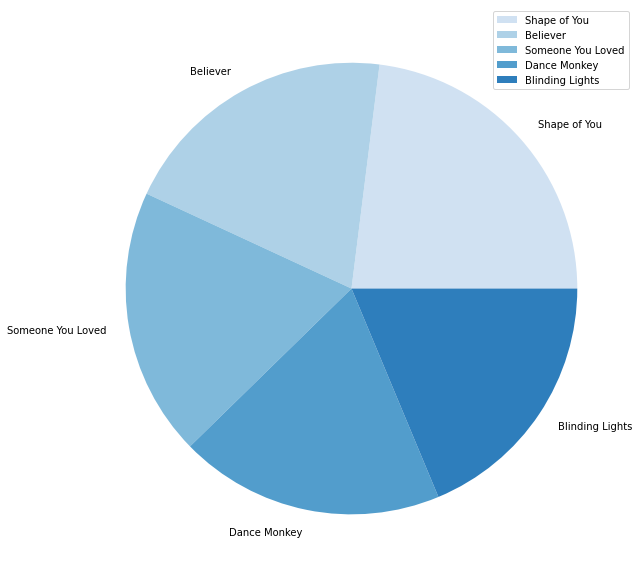

In [24]:
plt.style.use('_mpl-gallery-nogrid')

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(top_occurences)))
fig, ax = plt.subplots()
top_occurences.plot.pie(figsize = (8,8), colors=colors)

plt.axis('off')
plt.legend()
plt.show()

##### Ques2. Which artists have the most number of songs in the Top 200 and Viral 50 Charts? 

In [25]:
artist_occurence = df['artist'].value_counts()
print(artist_occurence)

Ed Sheeran                                                                 387917
Billie Eilish                                                              251825
Post Malone                                                                211272
Bad Bunny                                                                  203403
Ariana Grande                                                              189914
                                                                            ...  
Ezhel, Patron, Anıl Piyancı, Sansar Salvo, Allame, Pit10, Beta, Kamufle         1
Lips, George Mason, Rose McIver, Kimbra                                         1
Joakim Kleven, KOH                                                              1
Lazyloxy, Maiyarap, OG-ANIC, UrboyTJ                                            1
Luna 99                                                                         1
Name: artist, Length: 96156, dtype: int64


In [26]:
top_artists = artist_occurence.nlargest(n=5)
print(top_artists)

Ed Sheeran       387917
Billie Eilish    251825
Post Malone      211272
Bad Bunny        203403
Ariana Grande    189914
Name: artist, dtype: int64


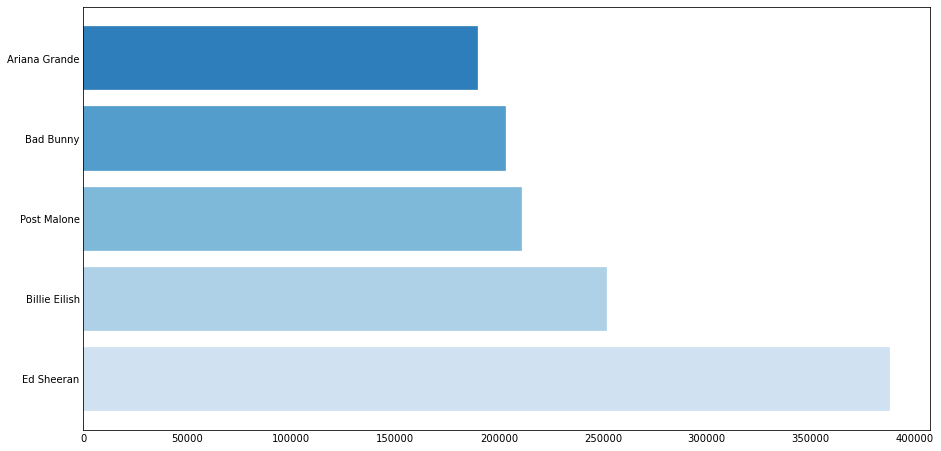

In [27]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(top_artists)))
fig = plt.figure(figsize=(12, 6))

artist = ['Ed Sheeran', 'Billie Eilish', 'Post Malone', 'Bad Bunny', 'Ariana Grande']

plt.barh(artist, top_artists, color=colors, edgecolor="white", linewidth=0.3)

plt.show()

##### Ques3. Find the popularity density of Ed Sheeran across all the regions in the world.

In [28]:
ed_sheeran_df = df.loc[df['artist'] == 'Ed Sheeran']
print(ed_sheeran_df['artist'])

309         Ed Sheeran
341         Ed Sheeran
571         Ed Sheeran
695         Ed Sheeran
737         Ed Sheeran
               ...    
26173275    Ed Sheeran
26173336    Ed Sheeran
26173410    Ed Sheeran
26173427    Ed Sheeran
26173499    Ed Sheeran
Name: artist, Length: 387917, dtype: object


In [95]:
ed_sheeran_df2 = df.groupby('region')['streams'].sum().to_frame().reset_index().sort_values(by=['streams'], ascending= False)
print(ed_sheeran_df2)

                  region       streams
22                Global  4.442563e+11
67         United States  1.471538e+11
6                 Brazil  6.083595e+10
39                Mexico  5.059645e+10
21               Germany  4.497162e+10
..                   ...           ...
40               Morocco  3.549777e+09
16                 Egypt  3.449073e+09
65  United Arab Emirates  3.448878e+09
64               Ukraine  1.916464e+09
57           South Korea  1.082929e+09

[70 rows x 2 columns]


In [115]:
ed_sheeran_df2['streams'] = (100 * ed_sheeran_df2['streams']/ed_sheeran_df2['streams'].sum())
finaldf = ed_sheeran_df2.head(6)
print(finaldf)

            region    streams
22          Global  30.715017
67   United States  10.173930
6           Brazil   4.206079
39          Mexico   3.498140
21         Germany   3.109250
66  United Kingdom   2.864650


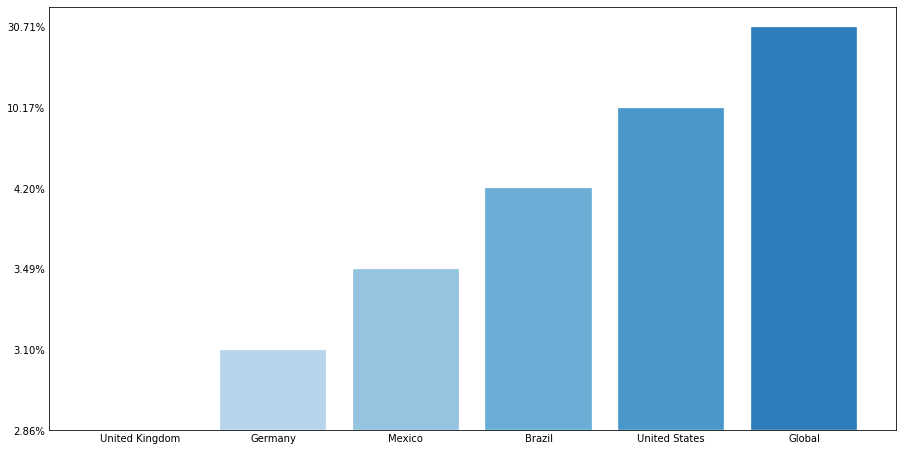

In [114]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(finaldf)))
fig = plt.figure(figsize=(12, 6))

streams = ['2.86%', '3.10%', '3.49%', '4.20%', '10.17%', '30.71%']
regions = ['United Kingdom', 'Germany', 'Mexico', 'Brazil', 'United States', 'Global']

plt.bar(regions, streams, color=colors, edgecolor="white", linewidth=0.3)

plt.show()

##### Ques4. What are the top countries which contribute the most to sales across the world? 

In [117]:
region_df = df.groupby('region')['streams'].sum()

In [120]:
region_df = region_df.sort_values(ascending = False)

In [129]:
top_regions = region_df.nlargest(n = 10)
top_regions.drop(top_regions.index[0], inplace=True)
print(top_regions)

region
United States     1.471538e+11
Brazil            6.083595e+10
Mexico            5.059645e+10
Germany           4.497162e+10
United Kingdom    4.143377e+10
Spain             3.208567e+10
Italy             3.061588e+10
France            2.889428e+10
Australia         2.515224e+10
Name: streams, dtype: float64


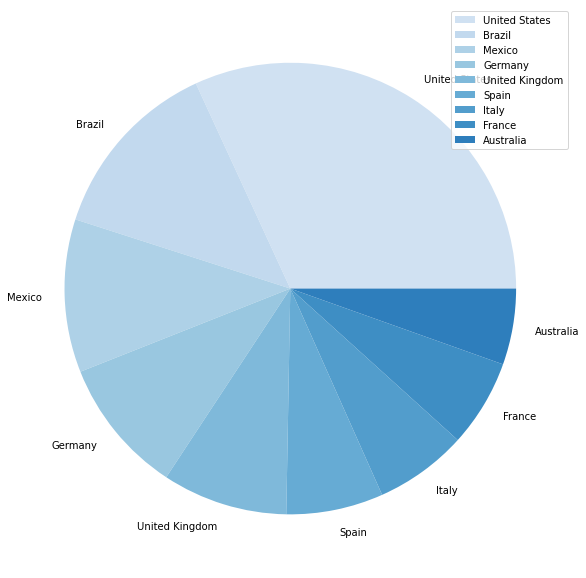

In [130]:
plt.style.use('_mpl-gallery-nogrid')

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(top_regions)))
fig, ax = plt.subplots()
top_regions.plot.pie(figsize = (8,8), colors=colors)

plt.axis('off')
plt.legend()
plt.show()

## **Summary and Conclusion:**

- The Spotify Dataset (2017-2021) was used to analyze how various countries have contributed towards the streaming and sales of music over the years, and the artists that have made a place in people's hearts over the years. 

- Ed Sheeran, Ariana Grande, Post Malone and Bad Bunny are some of the artists that have remained at the top over the last 5 years and have proven to be among the best. 

- Some of the songs released over the years like Believer, Shape of You, Someone You Loved and Blinding Lights have most people's favourites across the world, being played on loop. 

- The United States, United Kingdom, Germany and Brazil are some regions around the world which have contributed the most towards the music industry, be it their artists, or their people streaming and buying music.